# Kapasitas Gudang

# Introduction

## problem

kapasitas gudang dalam meter kubik 115.2 meter kubik
barang dalam meter kubik
1. beras, tepung, gula 0.36
2. mie instan 0.007
3. minyak 0.019

# Initiation

### Individu

In [146]:
# import module
import random
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [147]:
#beras, tepung, gula, mie, minyak
#barang = [0.36, 0.36, 0.36, 0.007, 0.019]

In [148]:
def create_individu(max):
    #return [(random.randint(0, max)*i, for i in barang]
    individu = []
    for i in barang:
        jml = random.randint(1, max)
        individu.append((jml, round(jml*i, 2)))
    return individu

### Population

In [149]:
def create_population(num_of_individu, max):
    return [create_individu(max) for i in range(num_of_individu)]

### Fitness Function

In [150]:
def fitness_value(individu, target):
#     summed = sum(individu)
#     return int(target-summed)
    total = 0
    for i in individu:
        total += i[1]
    return round(float(target-total),3)

In [151]:
def calc_population_fitness(population, target):
    return [fitness_value(individu, target) for individu in population]

# Representation

## One Variable

# Parent Selection

## Best Selection

In [152]:
def best_selection(population, target):
    pop_tuple = [(idv, fitness_value(idv, target)) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda pop: pop[1])  # sort by fitness
    # return 2 best individu
    best2 = []
    for idv in sorted_tuple:
        best2.append(idv[0])
    return best2[0:2]
    #return sorted_tuple[0:2]

## Roulette

In [153]:
# roulete
def roulette(population, target):
    '''
    aturan :
    jika telah terpilih 1 
    maka individu itu harus terdelete dari populasi untuk dilakukan roulete lagi
    '''
    pop = population.copy()
    selected = []
    for i in range(2):
        summed = sum(calc_population_fitness(pop, target))
        point = random.uniform(0, summed)
        total = 0
        for individu in pop:
            total = total + fitness_value(individu, target)
            if point < total:
                selected.append(individu)
                pop.remove(individu) #hapus individu untuk roulete selanjutnya
    return selected
    

## Simple Tournamen

In [154]:
def simple_tournament(population, target):
    random_idv = random.sample(population, 2)
    idv1 = random_idv[0]
    idv2 = random_idv[1]
    if fitness_value(idv1, target) >= fitness_value(idv2, target):
        #population.remove(idv1)
        return idv1
    else:
        #population.remove(idv2)
        return idv2
    
def parent_from_tournamen(population, target):
    selected = []
    for i in range(2):
        p = simple_tournament(population, target)
        selected.append(p)
    return selected

# Crossover

## Uniform

In [155]:
def uniform(parent):
    treshold = 0.6
    papa = parent[0]
    mama = parent[1]
    temp_indv = []
    for i in range(len(papa)):
        temp_indv.append(round(random.uniform(0, 1), 1))

    # print(temp_indv)
    # swap process
    offspring = []
    for i, g in enumerate(temp_indv):
        if g >= treshold:
            # isi gen papa
            offspring.append(papa[i])
        elif g < treshold:
            # isi gen mama
            offspring.append(mama[i])
    return offspring

## Point Crossover

In [156]:
def point_xover(parent):
    papa = parent[0]
    mama = parent[1]
    point_line = random.randint(0,len(papa)-1)
    offspring = papa[:point_line] + mama[point_line:]
    return offspring

# Mutation

In [157]:
def mutate(offspring, validation_data, max_val, mut_chance=0.67):
    '''
    mutasikan individu baru dengan metode replace
    nilai replace = random
    posisi gen = random
    lakukan validasi dengan gudang sebelum return
    '''
    r = round(random.uniform(0, 1), 2)
    if mut_chance > r:
        posisi = random.randint(0, len(offspring)-1)
        jml = random.randint(1, max_val)
        offspring[posisi] = (jml, jml*validation_data[posisi])
        return offspring
    else:
        return offspring

# Natural Selection

## Replace Worst Individu

In [158]:
def replace_worst_individu(population, new_offspring, target):
    population.append(new_offspring)

    # sorting population berdasarkan fitnes
    pop_tuple = [(fitness_value(idv, target), idv) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda idv: idv[0])

    # tuple terakhir pasti fitnes terjelek
    sorted_tuple.pop()
    pop = []
    for idv in sorted_tuple:
        pop.append(idv[1])
    return pop

In [159]:
def print_natural_selection(population, target):
    '''
    return in tuple format (fitness, individu)
    '''
    # sorting population berdasarkan fitnes
    pop_tuple = [(fitness_value(idv, target), idv) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda x: x[0])
    return pop_tuple

# Run Code Together
*coba kombinasinya*

In [160]:
'''
percobaan
kombinasi = one variable + best selection + uniform crossover + mutation *replace + replace worst individu
generasi = 100
'''
init_data = [0.36, 0.36, 0.36, 0.007, 0.019]
target = 115.2
max_val = 100
pop = create_population(10, max_val)
fitness = calc_population_fitness(pop, target)


generation = pop
cur_best_fitness = 100
histori = []
i = 1
print('generasi awal', generation)
print('--------------------------')
while (cur_best_fitness >= 0 and i <= 100):
    # for i in range(1,80):
    print('ini generasi ke ', i)
    hsl_selection = best_selection(generation, target)
    #hsl_selection = roulette(generation, vaksin)
    #hsl_selection = parent_from_tournamen(generation, vaksin)
    print('hasil selection', hsl_selection)
    #hsl_cross = uniform(hsl_selection)
    hsl_cross = point_xover(hsl_selection)
    print('hasil cross', hsl_cross)
    hsl_mutate = mutate(hsl_cross, init_data, max_val)
    print('hasil mutasi', hsl_mutate)
    hsl_replacement = replace_worst_individu(generation, hsl_mutate, target)
    #hsl_replacement = replace_worst_parent(generation, hsl_selection, hsl_mutate, vaksin)
    print('populasi baru')
    print(hsl_replacement)
    print('fitnes with individu')
    print(print_natural_selection(hsl_replacement, target))
    print('best fit and best individu in generation')
    print(print_natural_selection(hsl_replacement, target)[0])
    print('--------------------------')

    # ambil fitnes terbaik setiap generasi
    best_fit, best_idv = print_natural_selection(hsl_replacement, target)[0]
    if best_fit <= 0:
        break
    if best_fit < cur_best_fitness:
        cur_best_fitness = best_fit

    i += 1
    histori.append(best_fit)
    # reset generation dan isi dengan
    generation = hsl_replacement

generasi awal [[(25, 9.0), (64, 23.04), (37, 13.32), (2, 0.01), (21, 0.4)], [(45, 16.2), (65, 23.4), (32, 11.52), (15, 0.1), (4, 0.08)], [(36, 12.96), (19, 6.84), (44, 15.84), (2, 0.01), (72, 1.37)], [(47, 16.92), (45, 16.2), (27, 9.72), (59, 0.41), (69, 1.31)], [(47, 16.92), (5, 1.8), (78, 28.08), (10, 0.07), (2, 0.04)], [(4, 1.44), (58, 20.88), (25, 9.0), (10, 0.07), (48, 0.91)], [(1, 0.36), (70, 25.2), (16, 5.76), (49, 0.34), (76, 1.44)], [(82, 29.52), (17, 6.12), (18, 6.48), (7, 0.05), (10, 0.19)], [(72, 25.92), (77, 27.72), (35, 12.6), (1, 0.01), (27, 0.51)], [(93, 33.48), (100, 36.0), (65, 23.4), (62, 0.43), (17, 0.32)]]
--------------------------
ini generasi ke  1
hasil selection [[(93, 33.48), (100, 36.0), (65, 23.4), (62, 0.43), (17, 0.32)], [(72, 25.92), (77, 27.72), (35, 12.6), (1, 0.01), (27, 0.51)]]
hasil cross [(93, 33.48), (77, 27.72), (35, 12.6), (1, 0.01), (27, 0.51)]
hasil mutasi [(93, 33.48), (77, 27.72), (35, 12.6), (1, 0.01), (27, 0.51)]
populasi baru
[[(93, 33.48

fitnes with individu
[(13.446, [(93, 33.48), (100, 36.0), (83, 29.88), (95, 0.665), (91, 1.7289999999999999)]), (13.503, [(93, 33.48), (100, 36.0), (83, 29.88), (95, 0.665), (88, 1.672)]), (13.537, [(93, 33.48), (100, 36.0), (83, 29.88), (82, 0.5740000000000001), (91, 1.7289999999999999)]), (13.594, [(93, 33.48), (100, 36.0), (83, 29.88), (82, 0.5740000000000001), (88, 1.672)]), (13.594, [(93, 33.48), (100, 36.0), (83, 29.88), (82, 0.5740000000000001), (88, 1.672)]), (13.594, [(93, 33.48), (100, 36.0), (83, 29.88), (82, 0.5740000000000001), (88, 1.672)]), (13.594, [(93, 33.48), (100, 36.0), (83, 29.88), (82, 0.5740000000000001), (88, 1.672)]), (13.594, [(93, 33.48), (100, 36.0), (83, 29.88), (82, 0.5740000000000001), (88, 1.672)]), (13.594, [(93, 33.48), (100, 36.0), (83, 29.88), (82, 0.5740000000000001), (88, 1.672)]), (13.594, [(93, 33.48), (100, 36.0), (83, 29.88), (82, 0.5740000000000001), (88, 1.672)])]
best fit and best individu in generation
(13.446, [(93, 33.48), (100, 36.0), (

# Plot

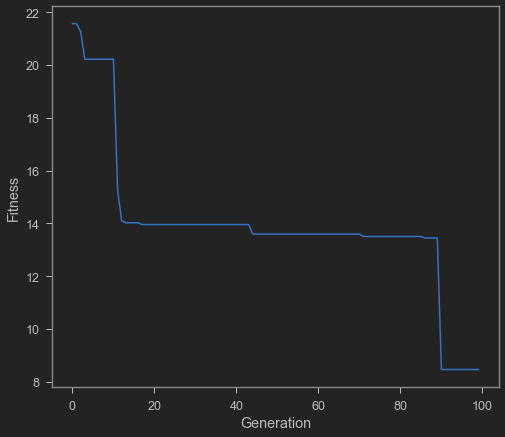

In [161]:
plt.plot(histori,marker='')
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.show()